In [5]:
import pandas as pd
import numpy as np
from kan import KAN
import torch

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('data/test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [45]:
Y_train = train_data["Survived"]
Y_train = pd.get_dummies(Y_train, prefix="Survived", dummy_na=False, dtype=np.int64)
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_all = pd.concat([train_data[features], test_data[features]], axis=0)
cols = []
for feature in features:
    cols.append(pd.get_dummies(X_all[feature], prefix=feature, dummy_na=False, dtype=np.int64))
X_all = pd.concat(cols, axis=1)
X_train = X_all.iloc[:len(train_data), :]
X_test = X_all.iloc[len(train_data):, :]
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float)
Y_train = torch.tensor(Y_train.to_numpy(), dtype=torch.long)
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float)
X_train.shape, Y_train.shape, X_test.shape

(torch.Size([891, 20]), torch.Size([891, 2]), torch.Size([418, 20]))

In [75]:
model = KAN(width=[20, 10, 2], grid=5, k=3)
dataset = {
    "train_input": X_train[:890, :],
    "train_label": Y_train[:890, :],
    "test_input": X_train[890:, :],
    "test_label": Y_train[890:, :]
}
model.train(dataset, opt="LBFGS", steps=50, lamb=0.01, lamb_entropy=10.)

description:   0%|                                                           | 0/50 [00:00<?, ?it/s]/root/miniconda3/envs/data/lib/python3.10/site-packages/kan/KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 4.86e-01 | test loss: 3.69e-01 | reg: 1.05e+02 : 100%|██| 50/50 [00:45<00:00,  1.11it/s]


{'train_loss': [array(0.47129995, dtype=float32),
  array(0.4703212, dtype=float32),
  array(0.47030866, dtype=float32),
  array(0.47331592, dtype=float32),
  array(0.47331592, dtype=float32),
  array(0.48751074, dtype=float32),
  array(0.48886487, dtype=float32),
  array(0.4887289, dtype=float32),
  array(0.4887289, dtype=float32),
  array(0.4887289, dtype=float32),
  array(0.4855924, dtype=float32),
  array(0.4855924, dtype=float32),
  array(0.4855924, dtype=float32),
  array(0.4855924, dtype=float32),
  array(0.4855924, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.4855908, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.4855908, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.48559076, dtype=float32),
  array(0.4855908, dtype=float32),
  array(0.48559076, dtype=

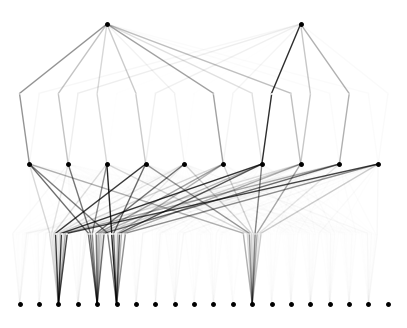

In [76]:
model.plot()

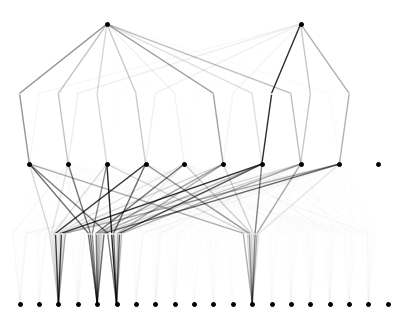

In [77]:
model.prune()
model.plot(mask=True)

In [78]:
predictions = model(X_test)
predictions.shape

torch.Size([418, 2])

In [79]:
predictions = torch.argmax(predictions, dim=1).numpy()

In [80]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('result/submission_kan_v3.csv', index=False)

In [70]:
# automatic mode
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x^2, r2=1.0000009536743164
fixing (0,0,1) with x^2, r2=1.0000009536743164
fixing (0,0,2) with exp, r2=1.0000007152557373
fixing (0,0,3) with x^3, r2=1.0000008344650269
fixing (0,0,4) with x^3, r2=1.0000008344650269
fixing (0,1,0) with x^3, r2=1.0000007152557373
fixing (0,1,1) with abs, r2=1.0000007152557373
fixing (0,1,2) with sqrt, r2=1.0000008344650269
fixing (0,1,3) with abs, r2=1.0000008344650269
fixing (0,1,4) with x^3, r2=1.0000008344650269
fixing (0,2,0) with exp, r2=1.0000009536743164
fixing (0,2,1) with x^4, r2=1.0000009536743164
fixing (0,2,2) with x^4, r2=1.0000009536743164
fixing (0,2,3) with sqrt, r2=1.000001072883606
fixing (0,2,4) with x^2, r2=1.000001072883606
fixing (0,3,0) with x^4, r2=1.0000007152557373
fixing (0,3,1) with sin, r2=1.0000009536743164
fixing (0,3,2) with x^2, r2=1.0000009536743164
fixing (0,3,3) with x^3, r2=1.0000009536743164
fixing (0,3,4) with exp, r2=1.000001072883606
fixing (0,4,0) with log, r2=1.0000008344650269
fixing (0,4,1)

In [72]:
model.train(dataset, opt="LBFGS", steps=100)

description:   0%|                                                          | 0/100 [00:00<?, ?it/s]/root/miniconda3/envs/data/lib/python3.10/site-packages/kan/KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: nan | test loss: nan | reg: nan :   5%|▊                | 5/100 [00:08<02:36,  1.65s/it]


Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorr

RuntimeError: false INTERNAL ASSERT FAILED at "../aten/src/ATen/native/BatchLinearAlgebra.cpp":1539, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.

In [73]:
model.symbolic_formula()

([nan, nan],
 [x_1,
  x_2,
  x_3,
  x_4,
  x_5,
  x_6,
  x_7,
  x_8,
  x_9,
  x_10,
  x_11,
  x_12,
  x_13,
  x_14,
  x_15,
  x_16,
  x_17,
  x_18,
  x_19,
  x_20])